In [1]:

#!pip install yahoo_fin
!pip install --upgrade yahoo_fin

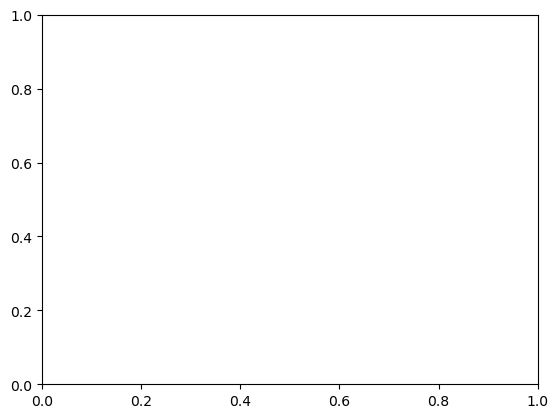

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yahoo_fin.stock_info import get_data

In [13]:
## Import NYSE stock from CSV
NYSE_stock_df = pd.read_csv('/Users/ellandalla/Desktop/BootCamp/NYSE_Download.csv')


In [ ]:
##print (get_data)

In [14]:
NYSE_stock_df.head()
##(NYSE_stock_df.columns)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$116.26,0.59,0.51%,3.437830e+10,United States,1999.0,3966054,Industrials,Electrical Products
1,AAP,Advance Auto Parts Inc.,$68.03,-4.86,-6.67%,4.043275e+09,United States,NaN,9504583,Consumer Discretionary,Auto & Home Supply Stores
2,AB,AllianceBernstein Holding L.P. Units,$35.21,0.44,1.27%,4.006937e+09,United States,NaN,145118,Finance,Investment Managers
3,ABBV,AbbVie Inc. Common Stock,$133.44,-4.52,-3.28%,2.354070e+11,United States,2012.0,11892220,Health Care,Biotechnology: Pharmaceutical Preparations
4,ABC,AmerisourceBergen Corporation Common Stock,$172.59,2.44,1.43%,3.490774e+10,United States,NaN,1539467,Health Care,Other Pharmaceuticals


In [15]:
stock_df_results = pd.DataFrame()
# write a for loop through Symbol column
for symbol in NYSE_stock_df['Symbol']:
    ##print(symbol)
#     get the data for that stock ticker
    data = get_data(symbol, start_date="01/01/2019", end_date="05/31/2023", index_as_date = True, interval="1mo")
#     save the data to stock_df_results
    stock_df_results = pd.concat([stock_df_results, data])

In [6]:
print (stock_df_results)

                 open       high        low      close   adjclose    volume  \
2019-01-01  66.500000  76.309998  62.000000  76.050003  73.790588  44194500   
2019-02-01  76.160004  79.839996  74.760002  79.440002  77.079895  35941700   
2019-03-01  80.000000  82.269997  77.400002  80.379997  77.991966  32806600   
2019-04-01  80.959999  82.239998  73.760002  78.500000  76.167831  41866300   
2019-05-01  78.489998  79.559998  66.029999  67.050003  65.191002  77266900   
...               ...        ...        ...        ...        ...       ...   
2023-01-01  21.450001  23.160000  20.100000  21.860001  21.725685  34046400   
2023-02-01  21.780001  25.100000  21.600000  23.000000  22.858677  29633200   
2023-03-01  22.870001  23.379999  19.290001  21.360001  21.292099  29525400   
2023-04-01  21.480000  22.180000  19.830000  21.549999  21.481493  26958400   
2023-05-01  21.400000  23.150000  20.700001  22.510000  22.438442  28416700   

           ticker  
2019-01-01      A  
2019-02-01 

In [7]:
NYSE_stock_df.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$116.26,0.59,0.51%,3.437830e+10,United States,1999.0,3966054,Industrials,Electrical Products
1,AAP,Advance Auto Parts Inc.,$68.03,-4.86,-6.67%,4.043275e+09,United States,NaN,9504583,Consumer Discretionary,Auto & Home Supply Stores
2,AB,AllianceBernstein Holding L.P. Units,$35.21,0.44,1.27%,4.006937e+09,United States,NaN,145118,Finance,Investment Managers
3,ABBV,AbbVie Inc. Common Stock,$133.44,-4.52,-3.28%,2.354070e+11,United States,2012.0,11892220,Health Care,Biotechnology: Pharmaceutical Preparations
4,ABC,AmerisourceBergen Corporation Common Stock,$172.59,2.44,1.43%,3.490774e+10,United States,NaN,1539467,Health Care,Other Pharmaceuticals


In [38]:
# merge the stock_df_results with stock_df to get the industry
NYSE_final_df = pd.merge(NYSE_stock_df[['Symbol', 'Sector']], stock_df_results.reset_index(), 
                            left_on="Symbol", right_on="ticker")
## Group By stock by industry and by price
grouped = NYSE_final_df.groupby(['Sector', 'index']).sum()
grouped_data = pd.DataFrame(grouped)
grouped_data.to_csv('grouped_data.csv')
#date = grouped_data.index.get_level_values(index)
grouped_data

/var/folders/73/hc_zb17944z42_dsmk15lr780000gn/T/ipykernel_67322/3759855817.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = NYSE_final_df.groupby(['Sector', 'index']).sum()


open         high          low  \
Sector          index                                               
Basic Materials 2019-01-01   204.639204   239.932716   198.052658   
                2019-02-01   235.279151   258.956432   225.919399   
                2019-03-01   243.869237   254.138839   223.373566   
                2019-04-01   242.406466   263.136069   227.721331   
                2019-05-01   242.177845   250.773847   212.255088   
...                                 ...          ...          ...   
Utilities       2023-01-01  3762.110004  3922.060012  3587.110005   
                2023-02-01  3757.439994  3886.520022  3536.849986   
                2023-03-01  3581.719962  3763.945003  3405.729976   
                2023-04-01  3682.290016  3854.129997  3587.839987   
                2023-05-01  3710.279984  3805.044999  3444.375016   

                                  close     adjclose      volume  
Sector          index                                             
Basic Materials 2019-01-01   235.672721   210.100497  1284641918  
                2019-02-01   242.528653   216.705994  1128737867  
                2019-03-01   240.278595   214.891112  1191214977  
                2019-04-01   243.003758   218.274976  1326251809  
                2019-05-01   219.617754   197.745058  1200404585  
...                                 ...          ...         ...  
Utilities       2023-01-01  3777.210019  3722.677670  2674348700  
                2023-02-01  3599.879999  3552.459373  2537775300  
                2023-03-01  3687.250010  3654.317290  3463305700  
                2023-04-01  3712.260011  3689.233388  2212119000  
                2023-05-01  3545.319982  3529.070063  3136930900  

[583 rows x 6 columns]

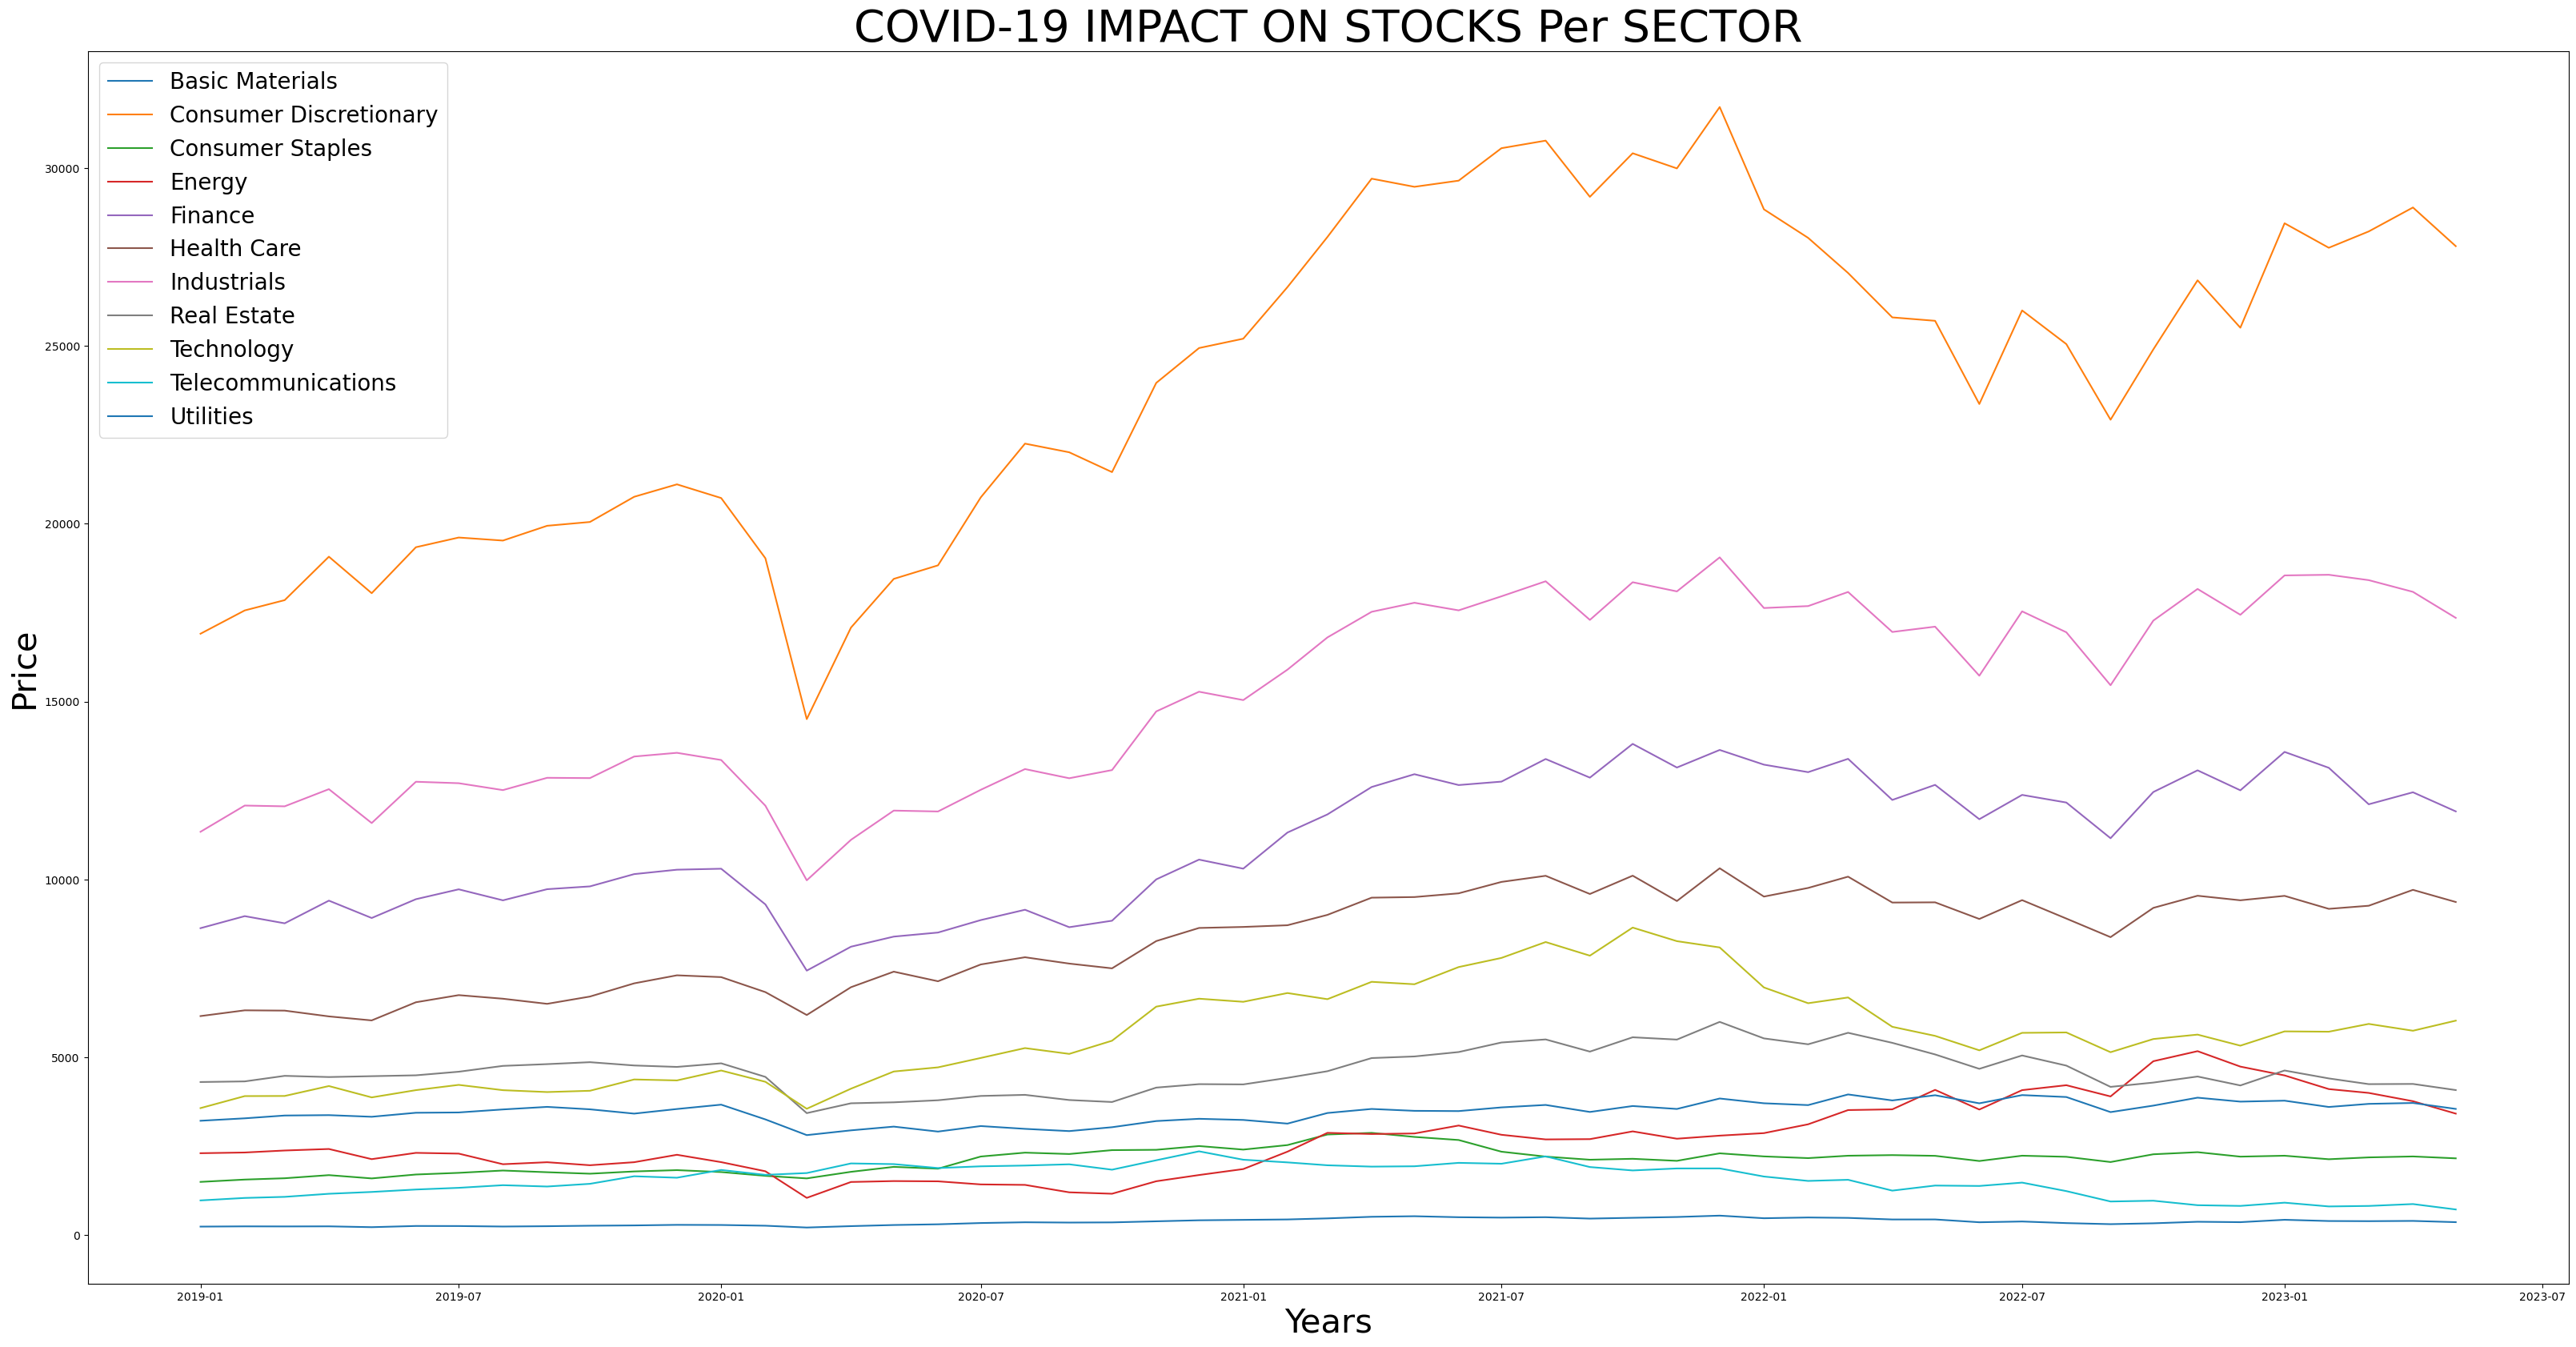

In [94]:
grouped_data_2 = grouped_data.reset_index()
plt.figure(figsize=(40,20))

for sector in grouped_data_2['Sector'].unique():
    sector_data = grouped_data_2[grouped_data_2['Sector'] == sector]
    date = sector_data['index']
    Price = sector_data['close']
    plt.plot(date, Price, label=sector)
    
plt.title('COVID-19 IMPACT ON STOCKS Per SECTOR', fontsize = 40)
plt.xlabel("Years", fontsize = 30)
plt.ylabel("Price", fontsize = 30)
plt.legend(fontsize = 20)
plt.show()